# Data & Networks
## Assignment 1
### Shané
#### Implementation of classification methods on a Kaggle dataset

## Introduction

This notebook implements and discusses the classification of mushrooms into either edible or poisonous. There are many different shapes and sizes of mushrooms, and no clear rule is known in order to determine wheter the mushroom is edible or not. The dataset was downloaded from Kaggle.com and four different classification methods will be applied to the data. The important features of the methods will also be investigated.

In [1]:
# importing all necessary libraries and packages
# specifically using sklearn as it provides commands for classification algorithms.
import pandas as pd
import numpy as np
import sklearn
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Pre-processing

The first task is to load the dataset into Python by reading the csv file and by making use of the pandas library. The form of the data must also be inspected in order to understand the data better. 

In [2]:
mush_data=pd.read_csv('mushrooms.csv')
print(np.shape(mush_data))
mush_data.head()

(8124, 23)


class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color   ...   stalk-surface-below-ring  \
0            c         n          k   ...                          s   
1            c         b          k   ...                          s   
2            c         b          n   ...                          s   
3            c         n          n   ...                          s   
4            w         b          k   ...                          s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

From the above, and also data provided on Kaggle.com about the dataset. The following is known:

There are 8124 samples.

There are 22 features.

The output is one dimensional; and can either be 'p' - poisonous or 'e' - edible.

Each of the features are described by a single letter as label, that describes the attribute of that specific feature.
For example cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s etc.

The next step in the pre-processing is to make sure that none of the data is zero or not a number:

In [3]:
# check to make sure that there is no data missing
mush_data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

From the above it is clear that there is no missing data, thus we continue and investigate the different attributes for one of the features.

In [4]:
mush_data['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

From the above, it is seen that the attributes are all letters and for the classification methods, it is preferable to work with numbers. For this reason we use the LabelEncoder from sklear_preprocessing and transform all of the attributes of the features to numbers. The transformed data is printed again to see the difference with the original data.

In [5]:
labelencoder=LabelEncoder()
for col in mush_data.columns:
    mush_data[col] = labelencoder.fit_transform(mush_data[col])
 
mush_data.head()

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color   ...     stalk-surface-below-ring  \
0             0          1           4   ...                            2   
1             0          0           4   ...                            2   
2             0          0           5   ...                            2   
3             0          1           5   ...                            2   
4             1          0           4   ...                            2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       7                       7          0           2   
1                       7                       7          0           2   
2                       7                       7          0           2   
3                       7                       7          0           2   
4                       7                       7          0           2   

   ring-number  ring-type  spore-print-color  population  habitat  
0            1          4                  2           3        5  
1            1          4                  3           2        1  
2            1          4                  3           2        3  
3            1          4                  2           3        5  
4            1          0                  3           0        1  

[5 rows x 23 columns]

Now the data must be split into the output and the input, it is done as follows:

In [6]:
X = mush_data.iloc[:,1:]
Y = mush_data['class']

In the next block, a scaler is used to scale the data. This will be used later.

In [7]:
scaler = StandardScaler()
Xs=scaler.fit_transform(X)

The last part of the pre-processing is to split the data into training and testing sets. The rule of 1/3 for testing data and 2/3 for training data is used.

In [8]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.33, random_state=42)
Xs_train, Xs_test, Ys_train, Ys_test = model_selection.train_test_split(Xs, Y, test_size=0.33, random_state=42)

In [9]:
# Also just obtain a list with the feature names so that it can be used for consitentcy and plotting later.
mush_data.head()
header = mush_data.keys()
L = []
for i in range(len(header)-1):
    L.append(header[i+1])

## Implementation of different methods

Logistic Regression is applied to both the unscaled and scaled data.

In [10]:
Reg = LogisticRegression()
Reg.fit(X_train[L], Y_train)
RegS = LogisticRegression()
RegS.fit(Xs_train, Ys_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

The decision tree method is applied to the data.

In [11]:
Tree = DecisionTreeClassifier()
Tree.fit(X_train[L],Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

The k-nearest neighbourhood method is applied to the data.

In [12]:
Neighbor = KNeighborsClassifier()
Neighbor.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

The random forest method is applied to the data.

In [13]:
Forest =RandomForestClassifier()
Forest.fit(X_train[L],Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

## Results of the different methods

The accuracies of each of the methods are computed by making use of the testing data set. The decision tree and random forest methods perform the best and have accuracies of 1. The k-nearest neighbour method also performs very well with 0.996 accuracy. The logistic regression method also performs well although not as good as the other methods. It is also seen that the accuracy is improved by about 0.04 when the scaled data is used instead of the unscaled data.

In [14]:
accReg = accuracy_score(Y_test, Reg.predict(X_test))
accRegS = accuracy_score(Ys_test, RegS.predict(Xs_test))
accTree = accuracy_score(Y_test, Tree.predict(X_test))
accNeighbor = accuracy_score(Y_test, Neighbor.predict(X_test))
accForest = accuracy_score(Y_test, Forest.predict(X_test))
print('Accuracy of logistic regression method without scaling: '+ str(accReg))
print('Accuracy of logistic regression method with scaling: '+ str(accRegS))
print('Accuracy of decision tree method: '+ str(accTree))
print('Accuracy of k-means: '+ str(accNeighbor))
print('Accuracy of random forests method: '+ str(accForest))

Accuracy of logistic regression method without scaling: 0.948526669153
Accuracy of logistic regression method with scaling: 0.952629615815
Accuracy of decision tree method: 1.0
Accuracy of k-means: 0.995897053338
Accuracy of random forests method: 1.0


The confusion matrices are also looked at, to translate the accuracies into numbers of correct and uncorrectly classified data.

In [15]:
ConfMat_Reg=confusion_matrix(Y_test,Reg.predict(X_test))
ConfMat_RegS=confusion_matrix(Ys_test,RegS.predict(Xs_test))
ConfMat_Tree=confusion_matrix(Y_test,Tree.predict(X_test))
ConfMat_Neighbor=confusion_matrix(Y_test,Neighbor.predict(X_test))
print('Confusion matrix for regression without scaling method')
print(ConfMat_Reg)
print('Confusion matrix for regression with scaling method')
print(ConfMat_RegS)
print('Confusion matrix for decision tree method')
print(ConfMat_Tree)
print('Confusion matrix for k means method')
print(ConfMat_Neighbor)

Confusion matrix for regression without scaling method
[[1313   65]
 [  73 1230]]
Confusion matrix for regression with scaling method
[[1311   67]
 [  60 1243]]
Confusion matrix for decision tree method
[[1378    0]
 [   0 1303]]
Confusion matrix for k means method
[[1369    9]
 [   2 1301]]


The accuracy of the different methods are all above 0.9. Thus it can be concluded that the data can be classified correctly by making use of the features provided.

## Feature importance in each of the methods

Lastly, the idea is to investigate which of the features are more significant in the different methods. For logistic regression, this is done by looking at the coefficient values. For the decision tree method and the random forests methods, the feature importances are examined. 

The following code is used to look at the magnitudes and also sign of the different coefficient in the logistic regression classifier. From the bar graph it can be seen that the gill-size is the most contributing feature to the positive side followed closely by veil color. For the negative side the most contributing feature is the gill-spacing. (Coefficient are normalised for better visualisation.) Only six features have a relative importance of more than 25%, while the rest are less important, with about 8 features, the coefficients are low in relative importance.

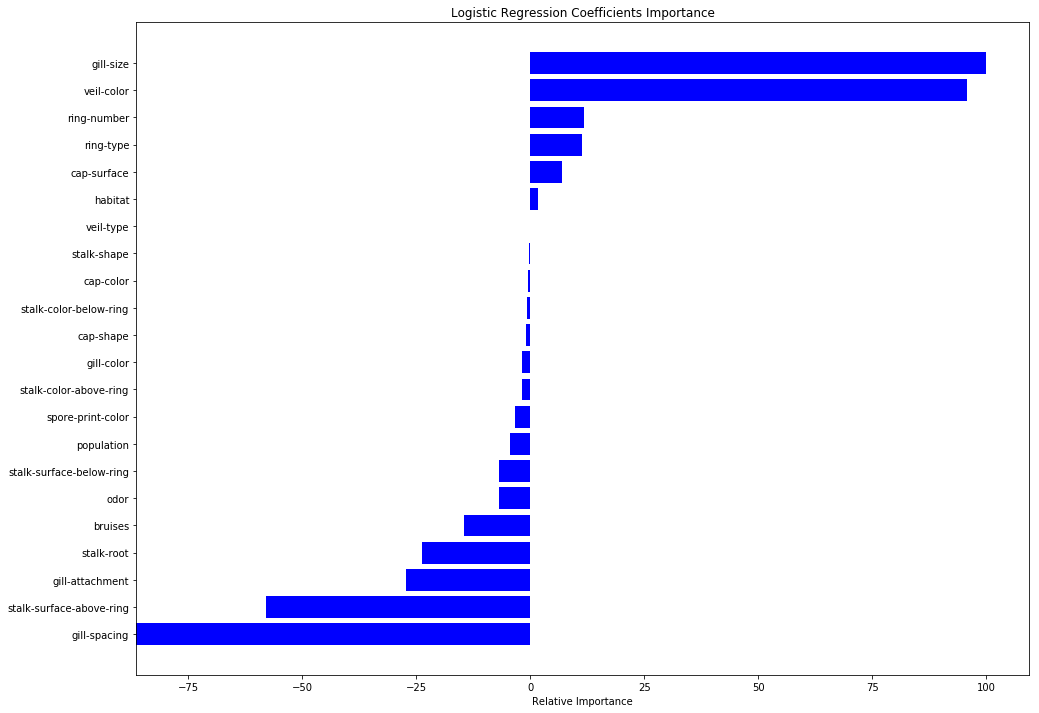

In [16]:
# Get the most important coefficients in the Logistic Regression method
coef_importance = Reg.coef_.ravel()
coef_importance = 100.0 * (coef_importance / coef_importance.max())
sorted_idx = np.argsort(coef_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(16, 12))
plt.barh(pos, coef_importance[sorted_idx], align='center', color='blue')
plt.yticks(pos, np.asanyarray(L)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Logistic Regression Coefficients Importance')
plt.show()

Next, the feature importance of the decision tree method is examined. It is clear that gill-color is the most important feature, and not closely followed by another feature. Then spore-print-color, population and gill-size are important features and the rest of the features have less than 15 % relative importance. While it seems like 10 features have almost no importance.

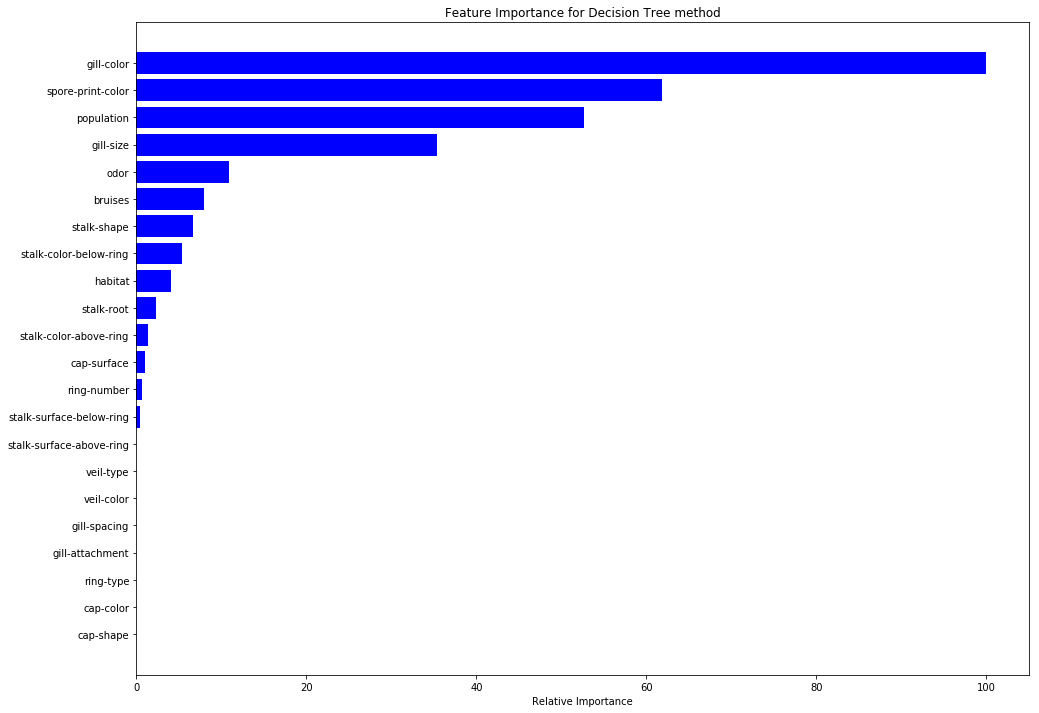

In [17]:
# Get the most important features in the Decision Tree method
feature_importance = Tree.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(16, 12))
plt.barh(pos, feature_importance[sorted_idx], align='center', color='blue')
plt.yticks(pos, np.asanyarray(L)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance for Decision Tree method')
plt.show()

Next, the feature importance of the random forests method is investigated. It is clear that odor is the most important feature, the next is gill-color. Then spore-print-color, gill-spacing and bruises follow and after that, the rest of the features follow closely, although not equal. Only two seem to be of no importance.

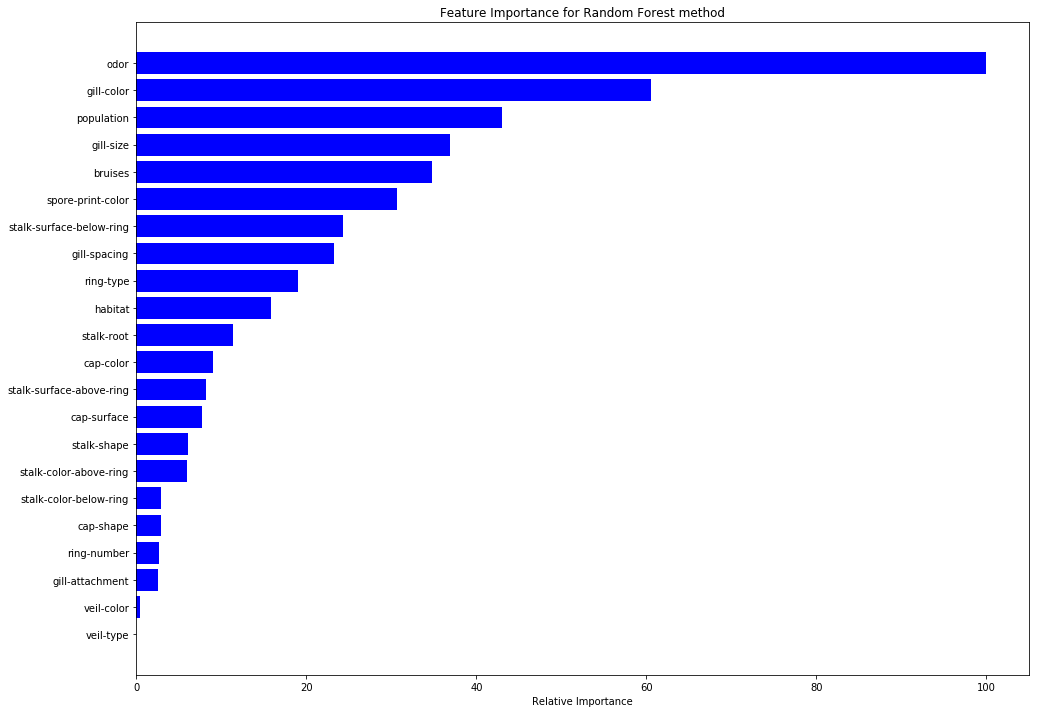

In [18]:
# Get the most important features in the Random Forest Method
feature_importance = Forest.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(16, 12))
plt.barh(pos, feature_importance[sorted_idx], align='center', color='blue')
plt.yticks(pos, np.asanyarray(L)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance for Random Forest method')
plt.show()

## Conclusion

In this notebook, different classification methods were used to detect if mushrooms are edible or posionous by looking at 22 features. Diffferent methods were used, however, the decision tree and the random forests methods performed very good and both with perfect accuracy. Thus the features provided are totally suffiecient to classify the data.

Concerning pre-processing, it seems as though the logistic regression method performs a little better with scaled data.

When the feature importance of three of the methods were investigated and displayed in the form of bar graphs, the most important feature of each method differed. However, gill-color and spore-print-color were in the top three in both the random forests and decision tree methods. For the logistic regression model, gill-size was a clear determining factor to wheter the mushroom is edible or posionous.